<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رمزگشایی از روایت‌های خاموش: نجات دادن جوانان از چنگال خودکشی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این چالش، شما به عنوان یک دانشمند داده با قلبی مشتاق برای نجات جان‌ها، ماموریت دارید که داده‌های گزارش‌دهی ملی مرگ‌های خشونت‌آمیز را تجزیه و تحلیل کنید. این داده‌ها شامل خلاصه‌ای از گزارش‌های انتظامی و پزشکی قانونی می‌باشد که مربوط به خودکشی‌های انجام‌شده توسط جوانان است. هدف از این تجزیه و تحلیل، شناسایی عوامل کلیدی است که می‌تواند به پیشگیری از خودکشی در آینده کمک کند.
داده‌های ارائه‌شده شامل روایت‌های مختلف و غیرقابل شناسایی است که توسط کارشناسان دولتی تهیه شده‌اند. این داده‌ها خلاصه‌ای از ماجراهای تلخی هستند که باید با دقت و حساسیت بررسی شوند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
pip install nlpaug

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup, AutoModel
from torch.utils.data import DataLoader, Dataset
from torch import nn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch.nn.functional as F
import numpy as np
import re
import concurrent.futures
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import nlpaug.augmenter.word as naw
import numpy as np
from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل ۳۰۰۰ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|uid|شناسه‌ی یکتای هر مورد|
|NarrativeLE|گزارش خلاصه‌ای از اطلاعات مامور قانون|
|NarrativeCME|خلاصه‌ای از اطلاعات گزارش پزشک قانونی/معاینه‌کننده پزشکی|
|DepressedMood|در آن زمان افسرده بوده یا خیر (۰ یا ۱)|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش نیز مانند مجموعه آموزش است با این تفاوت که ستون <code>DepressedMood</code> که متغیر هدف مسئله است را در خود ندارد. مجموعه داده آزمایش ۵۰۰ سطر دارد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [4]:
train_path = '/content/train.csv'
train_data = pd.read_csv(train_path)
train_data

,uid,NarrativeLE,NarrativeCME,DepressedMood
0,astm,V was a XX XX found unresponsive and hanging i...,V was a XX XX found unresponsive and hanging i...,0
1,eqeq,The V is an XX XX. The V called his girlfriend...,DC NOTES: EVIDENCE OF RECENT ALCOHOL USE; RECE...,1
2,arpf,V is a XX XX who died by suicide via multiple ...,V is a XX XX who died by suicide via multiple ...,0
3,ffal,Police were dispatched for a sick assist/ poss...,V is a XX XX who was found unresponsive in an ...,0
4,dyqf,Victim XX died of unspecified causes with an u...,Victim XX XX died from Self-Inflicted Intraora...,0
...,...,...,...,...
2995,begx,V was XXXX. V was found lying on the bed at hi...,V was XXXX. V was found lying on the bed at hi...,0
2996,coxo,"V was a XX, XX. [DC notes that the V is XX]Per...","V was a XX, XX. [DC notes that the V is XX]Per...",0
2997,cqrl,V was found hanging by a rope in the garage by...,V was a XX XX XX whose manner of death was sui...,0
2998,fftl,Officers responded to the report of a suicide ...,The Victim (V) was a XX XX XX XX. V was disco...,1


In [5]:
test_path = '/content/test.csv'
test_data = pd.read_csv(test_path)
test_data

,uid,NarrativeLE,NarrativeCME
0,azjz,V (XX XX) was found by his mother hanging by a...,"The V, a XX, XX, was staying at his father's h..."
1,cwke,V was XXXX. V was found at her residence unres...,V was XXXX. V was found in her residence suffe...
2,eqcg,V was XXXX. V was found at her boyfriend's res...,V was XXXX. V was found in another's residence...
3,abgm,A XX XX (V) was found with a GSW to the head i...,V is a XX XX with a medical history of bipolar...
4,cwwt,LE summary:V Demographics data is consistent w...,"XX, XX, Lived w/. - parents/family COD: Gunsh..."
...,...,...,...
495,abbe,V (XX XX) poisoned himself in his garage. V ...,V (XX XX) poisoned himself in his garage. V ...
496,dxof,Victim XX XX died of a self-intentional gunsho...,Victim XX XX died of a self-intentional gunsho...
497,fhqz,V is a XX XX who died by suicide via acute com...,V is a XX XX who died by suicide via acute com...
498,duwv,"The V was a XX, XX XX XX. The V called 911 at ...",The V was a XX XX. The V's family called LE to...


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [6]:
# do some preprocessing
class Preprocessor:
    def __init__(self, df, language='english'):
        self.df = df.copy()
        self.stop_words = set(stopwords.words(language))

    def handle_missing_value(self):
        self.df.fillna('', inplace=True)

    def cleaning(self, text):
        try:
            if not isinstance(text, str):
                text = str(text)

            text = text.lower()

            text = re.sub(r'\b[vV]\b', '', text)
            text = re.sub(r'\b(x{2,}\s*x{2,})\b', '', text)
            text = re.sub(r'\b(x{2,})\b', '', text)
            text = re.sub(r'[^\w\s]', '', text)
            text = re.sub(r'\s+', ' ', text)

            words = text.strip().split()
            words = [w for w in words if w not in self.stop_words]

            return ' '.join(words)

        except Exception:
            return str(text)

    def transform(self):
        text_columns = ["NarrativeLE", "NarrativeCME"]
        for col in text_columns:
            if col in self.df.columns:
                self.df[col] = self.df[col].apply(self.cleaning)
        return self.df

In [7]:
pre_train = Preprocessor(train_data)
df_train = pre_train.transform()
df_train = df_train.drop(columns="uid")
df_train

,NarrativeLE,NarrativeCME,DepressedMood
0,found unresponsive hanging residence boyfriend...,found unresponsive hanging residence boyfriend...,0
1,called girlfriend asked come residence somethi...,dc notes evidence recent alcohol use recent su...,1
2,died suicide via multiple injuries caused trai...,died suicide via multiple injuries caused trai...,0
3,police dispatched sick assist possible overdos...,found unresponsive apparent suicide rx overdos...,0
4,victim died unspecified causes unspecified wea...,victim died selfinflicted intraoral shotgun wo...,0
...,...,...,...
2995,found lying bed residence deceased apparent gu...,found lying bed residence deceased apparent gu...,0
2996,dc notes per police checked motel day prior fo...,dc notes per police checked motel day prior fo...,0
2997,found hanging rope garage stepfather ems respo...,whose manner death suicide hanging resided mot...,0
2998,officers responded report suicide progress vic...,victim discovered family hanging home parents ...,1


In [8]:
pre_test = Preprocessor(test_data)
df_test = pre_test.transform()
df_test = df_test.drop(columns="uid")
df_test

,NarrativeLE,NarrativeCME
0,found mother hanging nylon rope tree backyard ...,staying fathers house away different state mot...
1,found residence unresponsive result gsw head s...,found residence suffering gunshot wound head s...
2,found boyfriends residence unresponsive result...,found anothers residence unresponsive result g...
3,found gsw head backyard residence fiance said ...,medical history bipolar disorder ii unspecifie...
4,le summary demographics data consistent dc dat...,lived w parentsfamily cod gunshot wound head s...
...,...,...
495,poisoned garage reportedly depressed due famil...,poisoned garage reportedly depressed due famil...
496,victim died selfintentional gunshot wound head...,victim died selfintentional gunshot wound head...
497,died suicide via acute combined toxicity bupro...,died suicide via acute combined toxicity bupro...
498,called 911 1330 hours stated tired life gun go...,family called le locate le pinged cellphone fo...


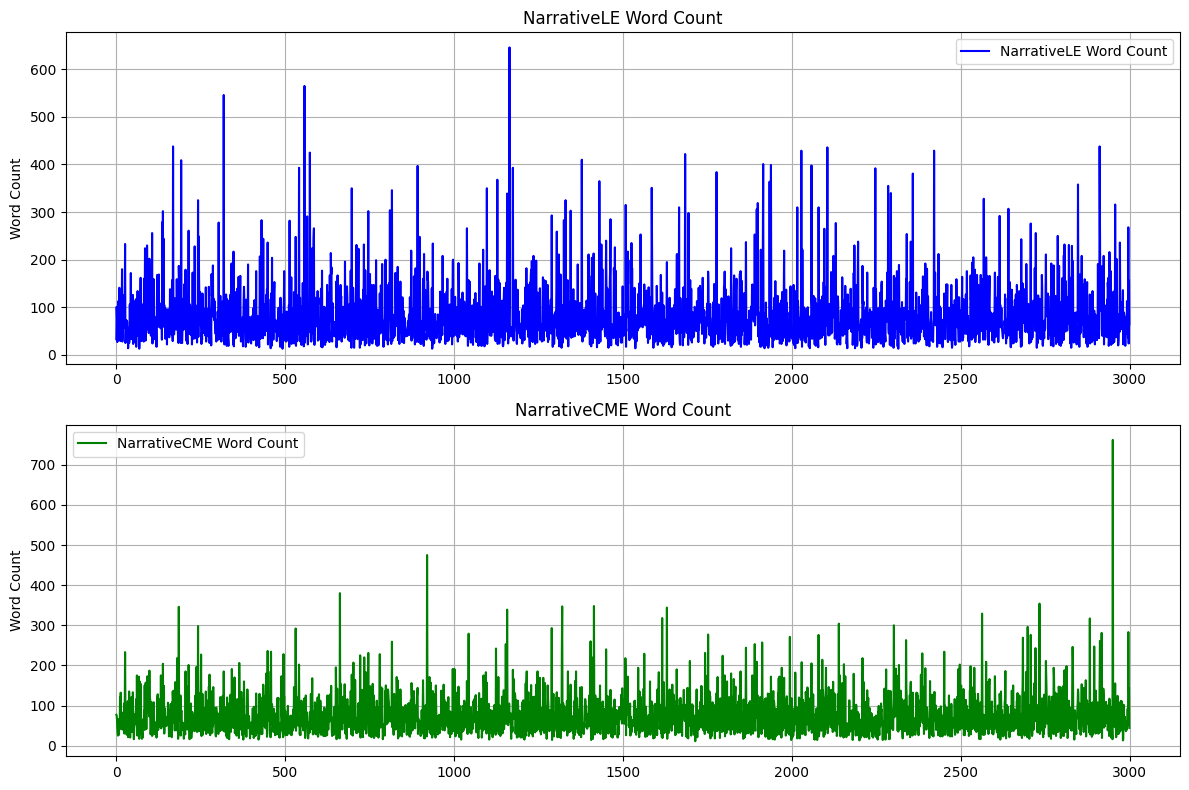

In [9]:
NarrativeLE_count = df_train['NarrativeLE'].apply(lambda x: len(str(x).split()))
NarrativeCME_count = df_train['NarrativeCME'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(NarrativeLE_count, label='NarrativeLE Word Count', color='blue')
plt.ylabel('Word Count')
plt.title('NarrativeLE Word Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(NarrativeCME_count, label='NarrativeCME Word Count', color='green')
plt.ylabel('Word Count')
plt.title('NarrativeCME Word Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


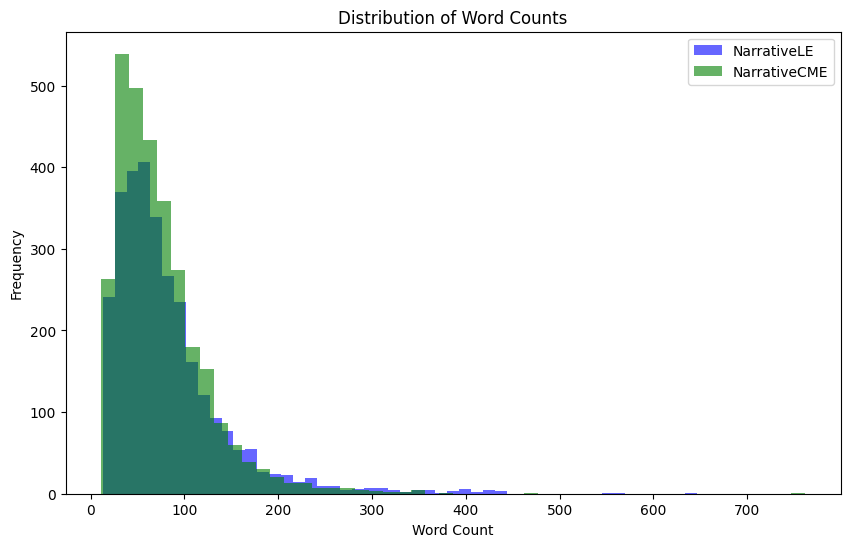

In [10]:
plt.figure(figsize=(10,6))
plt.hist(NarrativeLE_count, bins=50, color='blue', alpha=0.6, label='NarrativeLE')
plt.hist(NarrativeCME_count, bins=50, color='green', alpha=0.6, label='NarrativeCME')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.legend()
plt.show()


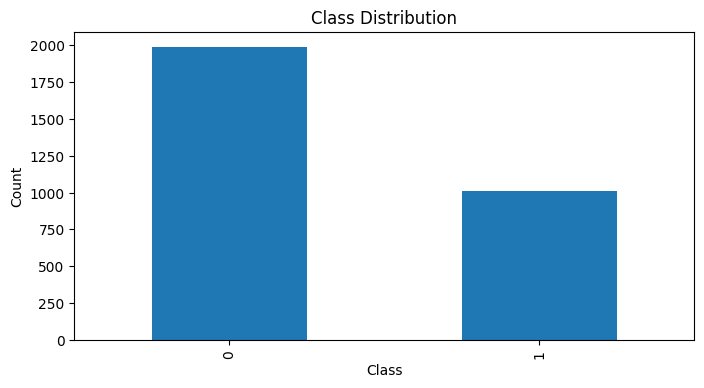

In [11]:
df_train['DepressedMood'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


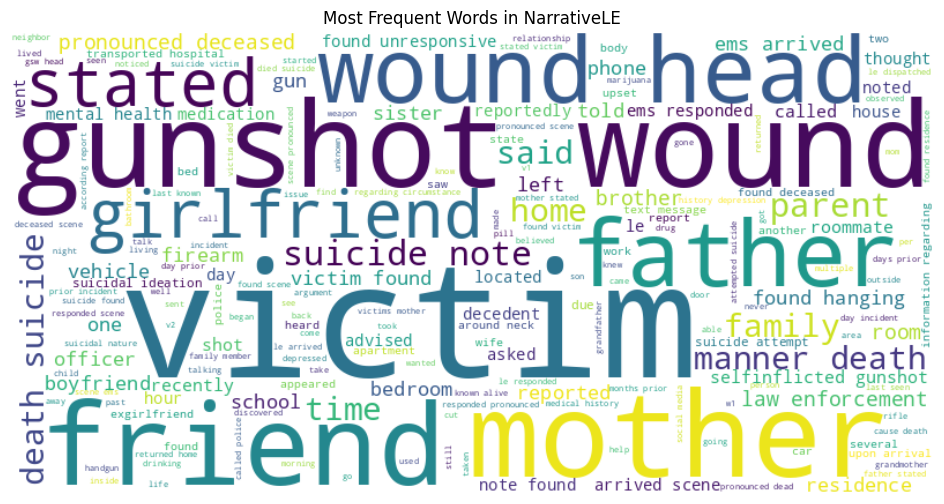

In [12]:
text_all = ' '.join(df_train['NarrativeLE'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in NarrativeLE')
plt.show()

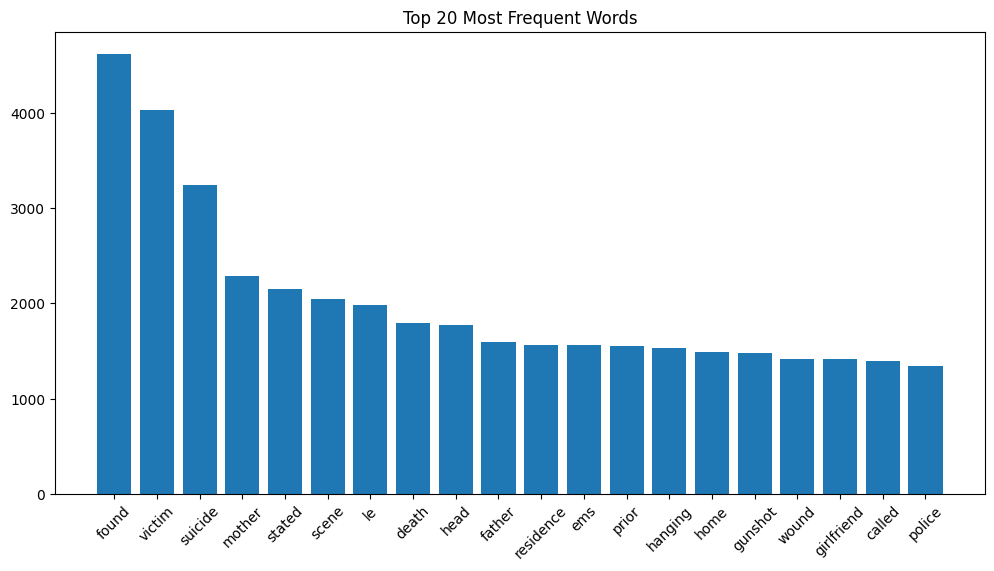

In [13]:
all_words = ' '.join(df_train['NarrativeLE']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()

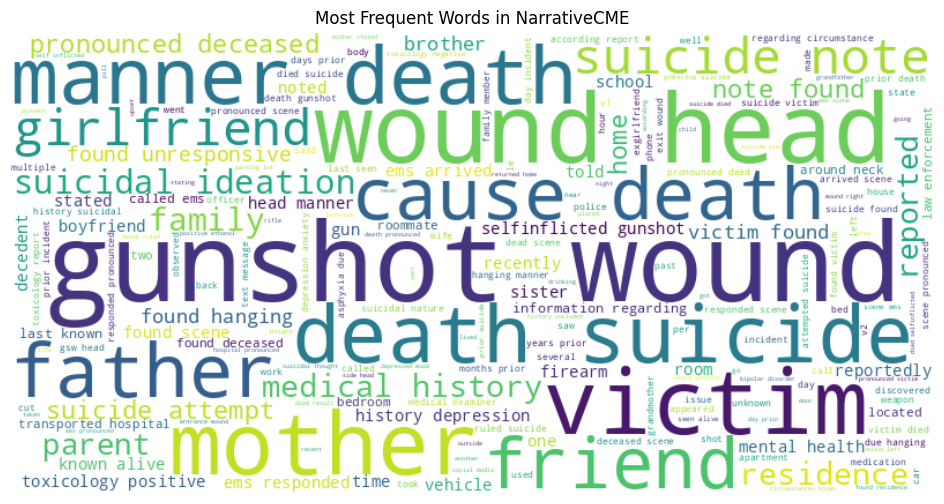

In [14]:
text_all = ' '.join(df_train['NarrativeCME'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in NarrativeCME')
plt.show()

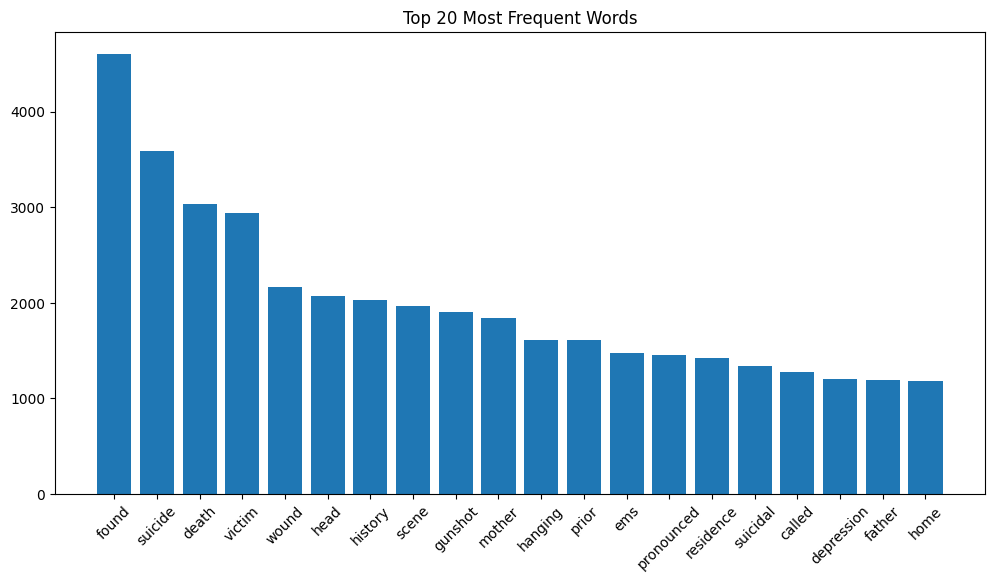

In [15]:
all_words = ' '.join(df_train['NarrativeCME']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()

In [16]:
df_train['DepressedMood'].value_counts()

,count
DepressedMood,
0,1992
1,1008


In [17]:
print(f'depressedmood for class 0 is {1992 / 3000 * 100}%')
print(f'depressedmood for class 1 is {1008 / 3000 * 100}%')

depressedmood for class 0 is 66.4%
depressedmood for class 1 is 33.6%


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    شما مجاز هستید از هر مدلی که آموخته‌اید استفاده کنید. به عبارت بهتر، هدف این سوال پیش‌بینی هرچه بهتر متغیر هدف مسئله است!
</font>
</p>

In [18]:
# modeling
labels = df_train['DepressedMood'].tolist()
texts = []
for _, row in df_train.iterrows():
    text_data = {
        'NarrativeLE': row['NarrativeLE'],
        'NarrativeCME': row['NarrativeCME'],
    }
    texts.append(text_data)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>accuracy</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را برای این ستون <i>DepressedMood </i> جداگانه به دست آورده و آن را اعلام کنید
</font>
</p>

In [19]:
# evaluate model
class MultiTextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length, num_columns=2):

        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.num_columns = num_columns

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text_data = self.texts[idx]
        label = self.labels[idx]

        columns = list(text_data.keys())
        texts = [text_data[col] for col in columns]

        column_encoding = self.tokenizer(
            texts,
            return_tensors='pt',
            max_length=self.max_length,
            padding='max_length',
            truncation=True
        )

        input_ids = column_encoding['input_ids']
        attention_mask = column_encoding['attention_mask']
        label = torch.tensor(label, dtype=torch.long)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': label
        }


In [20]:
#model_name = "mental/mental-bert-base-uncased"
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#ex = MultiTextClassificationDataset(texts=[texts[0]],labels=[labels[0]],tokenizer=tokenizer,max_length=512)
#sample = ex[0]
#print("Shape of input_ids:", sample['input_ids'].shape)
#print("Shape of attention_mask:", sample['attention_mask'].shape)
#print("Shape of label:", sample['label'].shape)

In [21]:
class MultiColumnBERTClassifier(nn.Module):
    def __init__(self, model_name="bert-base-uncased", num_classes=2, num_columns=2):
        super(MultiColumnBERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)

        #for param in self.bert.parameters():
            #param.requires_grad = False

        self.num_columns = num_columns
        self.hidden_size = self.bert.config.hidden_size

        self.fc1 = nn.Linear(self.hidden_size * num_columns, 400)
        self.gelu1 = nn.GELU()
        self.layernorm1 = nn.LayerNorm(400)
        self.dropout1 = nn.Dropout(0.4)

        self.classifier = nn.Linear(400, num_classes)

    def forward(self, input_ids, attention_mask):


        batch_size, num_columns, seq_len = input_ids.shape

        input_ids_flat = input_ids.reshape(-1, seq_len)  # (batch_size * num_columns, seq_len)
        attention_mask_flat = attention_mask.reshape(-1, seq_len)

        outputs = self.bert(input_ids=input_ids_flat, attention_mask=attention_mask_flat)
        cls_emb = outputs.last_hidden_state[:, 0, :]  # (batch_size * num_columns, hidden_size)

        concat_emb = cls_emb.reshape(batch_size, num_columns * self.hidden_size) # (batch_size, hidden_size * num_columns)

        x = self.dropout1(self.layernorm1(self.gelu1(self.fc1(concat_emb))))
        logits = self.classifier(x)

        return logits

In [22]:
def train(model, data_loader, optimizer, labels, scheduler=None, device='cuda', num_epochs=1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = model.to(device)
    model.train()

    #class_counts = Counter(labels)
    #total = sum(class_counts.values())
    #weights = torch.tensor([class_counts[1]/total, class_counts[0]/total]).to(device)
    criterion = nn.CrossEntropyLoss()

    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(num_epochs):
        total_loss = 0
        train_accuracies = []

        loop = tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

        for batch in loop:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = criterion(logits, labels)
            total_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            batch_acc = (preds == labels).float().mean().item()
            train_accuracies.append(batch_acc)

            loss.backward()
            optimizer.step()

            loop.set_postfix(loss=loss.item(), acc=batch_acc, refresh=True)

        avg_loss = total_loss / len(data_loader)
        avg_accuracy = sum(train_accuracies) / len(train_accuracies)

        if scheduler:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(avg_loss)
            else:
                scheduler.step()

        epoch_losses.append(avg_loss)
        epoch_accuracies.append(avg_accuracy)

        print(f"\nEpoch {epoch+1}: Loss: {avg_loss:.4f} | Accuracy: {avg_accuracy:.4f}")

        torch.cuda.empty_cache()

    return epoch_losses, epoch_accuracies

In [23]:
def evaluate(model, data_loader, labels, device='cuda'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    predictions, actual_labels = [], []
    eval_losses = []
    eval_accuracies = []

    class_counts = Counter(labels)
    total = sum(class_counts.values())
    weights = torch.tensor([class_counts[1]/total, class_counts[0]/total]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    loop = tqdm(data_loader, desc="Evaluating", leave=True)

    with torch.no_grad():
        total_loss = 0

        for batch in loop:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = criterion(logits, labels)
            total_loss += loss.item()
            eval_losses.append(loss.item())

            preds = torch.argmax(logits, dim=1)
            batch_acc = (preds == labels).float().mean().item()
            eval_accuracies.append(batch_acc)

            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

            loop.set_postfix(loss=loss.item(), acc=batch_acc, refresh=True)

    avg_loss = total_loss / len(eval_losses)
    avg_accuracy = sum(eval_accuracies) / len(eval_accuracies)
    report = classification_report(actual_labels, predictions, digits=4)

    print(f"\nValidation Loss: {avg_loss:.4f} | Validation Accuracy: {avg_accuracy:.4f}")
    return avg_loss, avg_accuracy, eval_losses, eval_accuracies, report

In [24]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [25]:
# balance train texts

device = 'cuda' if torch.cuda.is_available() else 'cpu'

aug = naw.ContextualWordEmbsAug(
    model_path='distilroberta-base',
    action='substitute',
    device=device,
    batch_size=16
)

texts_0 = [t for t, l in zip(train_texts, train_labels) if l == 0]
texts_1 = [t for t, l in zip(train_texts, train_labels) if l == 1]

len_0, len_1 = len(texts_0), len(texts_1)

if len_0 < len_1:
    minority_texts, minority_label = texts_0, 0
    target_count = len_1
else:
    minority_texts, minority_label = texts_1, 1
    target_count = len_0

needed = target_count - len(minority_texts)
samples = np.random.choice(minority_texts, size=needed, replace=True)

batch_size = 16
augmented_texts = []
for i in range(0, len(samples), batch_size):
    batch = samples[i:i+batch_size]
    batch_aug_LE = aug.augment([s["NarrativeLE"] for s in batch])
    batch_aug_CME = aug.augment([s["NarrativeCME"] for s in batch])
    for le, cme in zip(batch_aug_LE, batch_aug_CME):
        augmented_texts.append({"NarrativeLE": le, "NarrativeCME": cme})

balanced_train_texts = train_texts + augmented_texts
balanced_train_labels = train_labels + [minority_label] * len(augmented_texts)

balanced_train_texts, balanced_train_labels = shuffle(
    balanced_train_texts, balanced_train_labels, random_state=42
)

print(f" کلاس 0 = {sum(np.array(balanced_train_labels)==0)}, کلاس 1 = {sum(np.array(balanced_train_labels)==1)}")



The following layers were not sharded: roberta.encoder.layer.*.output.dense.weight, roberta.encoder.layer.*.attention.output.dense.weight, roberta.embeddings.token_type_embeddings.weight, roberta.encoder.layer.*.attention.self.key.weight, roberta.encoder.layer.*.intermediate.dense.weight, roberta.encoder.layer.*.output.dense.bias, roberta.encoder.layer.*.attention.self.query.bias, roberta.embeddings.LayerNorm.weight, roberta.encoder.layer.*.attention.self.key.bias, roberta.encoder.layer.*.attention.output.LayerNorm.bias, lm_head.decoder.weight, lm_head.bias, roberta.encoder.layer.*.attention.output.dense.bias, lm_head.decoder.bias, lm_head.layer_norm.weight, roberta.encoder.layer.*.attention.self.value.weight, lm_head.dense.weight, roberta.embeddings.word_embeddings.weight, lm_head.layer_norm.bias, roberta.encoder.layer.*.attention.self.query.weight, lm_head.dense.bias, roberta.embeddings.LayerNorm.bias, roberta.encoder.layer.*.intermediate.dense.bias, roberta.encoder.layer.*.output.La

 کلاس 0 = 1604, کلاس 1 = 1604


In [26]:
#"huawei-noah/TinyBERT_General_4L_312D"
#microsoft/deberta-v3-base
#"bert-base-uncased"
#"google/electra-base-discriminator"
#"roberta-base"
model_name = "roberta-base"
num_columns = 2
num_classes = 2
max_length = 512
batch_size = 4
num_epochs = 6
learning_rate = 2e-3
ignore_mismatched_sizes=True

In [27]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
train_dataset = MultiTextClassificationDataset(balanced_train_texts, balanced_train_labels, tokenizer, max_length)
val_dataset = MultiTextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiColumnBERTClassifier(model_name,num_classes=num_classes ,num_columns=num_columns)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
total_steps = len(train_dataloader) * num_epochs
warmup_steps = int(0.1 * total_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps)
gradient_accumulation_steps = 2

The following layers were not sharded: encoder.layer.*.attention.self.key.bias, embeddings.LayerNorm.weight, encoder.layer.*.attention.output.dense.weight, encoder.layer.*.intermediate.dense.bias, encoder.layer.*.output.LayerNorm.bias, embeddings.LayerNorm.bias, encoder.layer.*.output.LayerNorm.weight, pooler.dense.weight, embeddings.position_embeddings.weight, embeddings.word_embeddings.weight, encoder.layer.*.attention.self.value.weight, encoder.layer.*.output.dense.weight, encoder.layer.*.attention.self.key.weight, encoder.layer.*.attention.self.value.bias, pooler.dense.bias, embeddings.token_type_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.output.dense.bias, encoder.layer.*.attention.self.query.bias, encoder.layer.*.intermediate.dense.weight, encoder.layer.*.attention.output.LayerNorm.weight, encoder.layer.*.attention.output.dense.bias, encoder.layer.*.attention.self.query.weight
Some weights of RobertaModel were not initialized from the mode

In [29]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_acc = 0.0
best_model_path = 'best_model.pth'

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss, train_acc = train(model, train_dataloader, optimizer,labels=labels ,scheduler=scheduler, device=device)

    val_loss, val_acc, eval_losses, eval_accuracies, report = evaluate(model, val_dataloader,labels=labels, device=device)

    print(report)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f"New best model saved at epoch {epoch + 1} with val_acc: {val_acc:.4f}")


Epoch 1/6


Epoch 1/1: 100%|██████████| 802/802 [09:55<00:00,  1.35it/s, acc=0.25, loss=1.05]



Epoch 1: Loss: 0.7701 | Accuracy: 0.4922


Evaluating: 100%|██████████| 150/150 [00:31<00:00,  4.76it/s, acc=0, loss=0.822]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Validation Loss: 0.7097 | Validation Accuracy: 0.3533
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       388
           1     0.3533    1.0000    0.5222       212

    accuracy                         0.3533       600
   macro avg     0.1767    0.5000    0.2611       600
weighted avg     0.1248    0.3533    0.1845       600

New best model saved at epoch 1 with val_acc: 0.3533
Epoch 2/6


Epoch 1/1: 100%|██████████| 802/802 [10:03<00:00,  1.33it/s, acc=0.75, loss=0.495]



Epoch 1: Loss: 0.6181 | Accuracy: 0.6515


Evaluating: 100%|██████████| 150/150 [00:32<00:00,  4.69it/s, acc=1, loss=0.141]



Validation Loss: 0.4656 | Validation Accuracy: 0.7883
              precision    recall  f1-score   support

           0     0.8556    0.8093    0.8318       388
           1     0.6824    0.7500    0.7146       212

    accuracy                         0.7883       600
   macro avg     0.7690    0.7796    0.7732       600
weighted avg     0.7944    0.7883    0.7904       600

New best model saved at epoch 2 with val_acc: 0.7883
Epoch 3/6


Epoch 1/1: 100%|██████████| 802/802 [10:03<00:00,  1.33it/s, acc=0.75, loss=1.14]



Epoch 1: Loss: 0.4524 | Accuracy: 0.7989


Evaluating: 100%|██████████| 150/150 [00:32<00:00,  4.68it/s, acc=1, loss=0.0758]



Validation Loss: 0.4722 | Validation Accuracy: 0.8233
              precision    recall  f1-score   support

           0     0.8579    0.8711    0.8645       388
           1     0.7573    0.7358    0.7464       212

    accuracy                         0.8233       600
   macro avg     0.8076    0.8035    0.8054       600
weighted avg     0.8223    0.8233    0.8227       600

New best model saved at epoch 3 with val_acc: 0.8233
Epoch 4/6


Epoch 1/1: 100%|██████████| 802/802 [10:03<00:00,  1.33it/s, acc=0.75, loss=0.661]



Epoch 1: Loss: 0.3762 | Accuracy: 0.8454


Evaluating: 100%|██████████| 150/150 [00:32<00:00,  4.68it/s, acc=1, loss=0.0472]



Validation Loss: 0.5148 | Validation Accuracy: 0.7700
              precision    recall  f1-score   support

           0     0.9032    0.7216    0.8023       388
           1     0.6276    0.8585    0.7251       212

    accuracy                         0.7700       600
   macro avg     0.7654    0.7901    0.7637       600
weighted avg     0.8058    0.7700    0.7750       600

Epoch 5/6


Epoch 1/1: 100%|██████████| 802/802 [10:03<00:00,  1.33it/s, acc=0.75, loss=0.258]



Epoch 1: Loss: 0.2991 | Accuracy: 0.8856


Evaluating: 100%|██████████| 150/150 [00:31<00:00,  4.69it/s, acc=1, loss=0.0176]



Validation Loss: 0.5567 | Validation Accuracy: 0.8083
              precision    recall  f1-score   support

           0     0.8273    0.8892    0.8571       388
           1     0.7650    0.6604    0.7089       212

    accuracy                         0.8083       600
   macro avg     0.7962    0.7748    0.7830       600
weighted avg     0.8053    0.8083    0.8047       600

Epoch 6/6


Epoch 1/1: 100%|██████████| 802/802 [10:03<00:00,  1.33it/s, acc=1, loss=0.139]



Epoch 1: Loss: 0.2526 | Accuracy: 0.9043


Evaluating: 100%|██████████| 150/150 [00:32<00:00,  4.68it/s, acc=1, loss=0.03]


Validation Loss: 0.5403 | Validation Accuracy: 0.8067
              precision    recall  f1-score   support

           0     0.8400    0.8660    0.8528       388
           1     0.7400    0.6981    0.7184       212

    accuracy                         0.8067       600
   macro avg     0.7900    0.7820    0.7856       600
weighted avg     0.8047    0.8067    0.8053       600



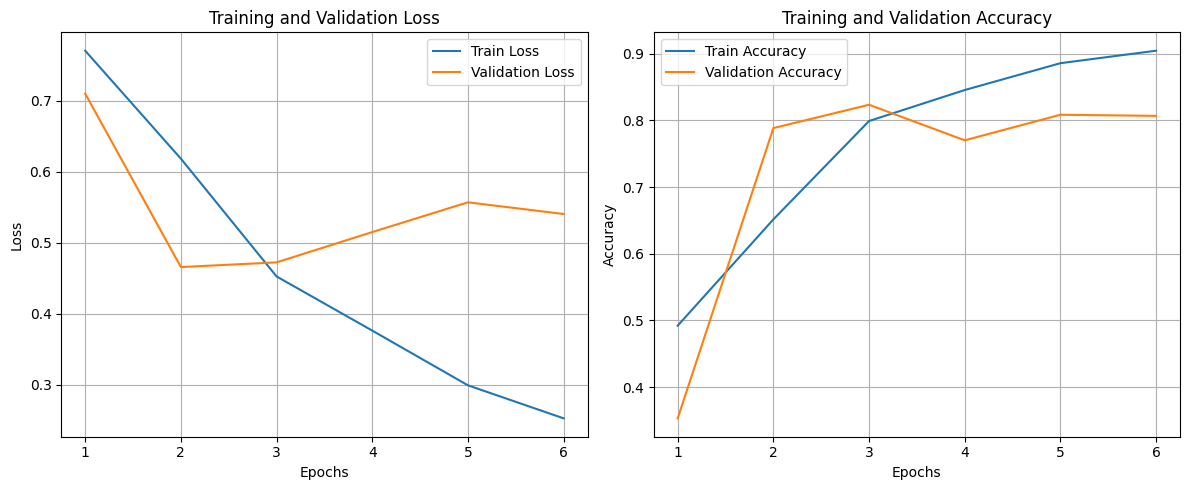

In [30]:
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 5))

# --- Loss ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

# --- Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|DepressedMood|در آن زمان افسرده بوده یا خیر (۰ یا ۱)|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل یک ستون با اسم <i>DepressedMood</i> است و ۵۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>DepressedMood</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|DepressedMood|
|-----|
|1|
|0|
|0|
|0|
|1|

</font>
</div>



In [33]:
df_test

,NarrativeLE,NarrativeCME
0,found mother hanging nylon rope tree backyard ...,staying fathers house away different state mot...
1,found residence unresponsive result gsw head s...,found residence suffering gunshot wound head s...
2,found boyfriends residence unresponsive result...,found anothers residence unresponsive result g...
3,found gsw head backyard residence fiance said ...,medical history bipolar disorder ii unspecifie...
4,le summary demographics data consistent dc dat...,lived w parentsfamily cod gunshot wound head s...
...,...,...
495,poisoned garage reportedly depressed due famil...,poisoned garage reportedly depressed due famil...
496,victim died selfintentional gunshot wound head...,victim died selfintentional gunshot wound head...
497,died suicide via acute combined toxicity bupro...,died suicide via acute combined toxicity bupro...
498,called 911 1330 hours stated tired life gun go...,family called le locate le pinged cellphone fo...


In [34]:
model.load_state_dict(torch.load(best_model_path))

<All keys matched successfully>

In [45]:
class MultiTextInferenceDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length, num_columns=2):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.num_columns = num_columns

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text_data = self.texts[idx]
        columns = ['NarrativeLE', 'NarrativeCME']
        texts = [text_data[col] for col in columns]

        column_encoding = self.tokenizer(
            texts,
            return_tensors='pt',
            max_length=self.max_length,
            padding='max_length',
            truncation=True
        )

        input_ids = column_encoding['input_ids'].squeeze(0)
        attention_mask = column_encoding['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }

def predict(model, tokenizer, df, max_length=512, batch_size=16, device='cuda' if torch.cuda.is_available() else 'cpu', return_probs=False):

    model.eval()
    model.to(device)

    texts = []
    for _, row in df.iterrows():
        text_data = {
            'NarrativeLE': row['NarrativeLE'],
            'NarrativeCME': row['NarrativeCME']
        }
        texts.append(text_data)

    dataset = MultiTextInferenceDataset(texts, tokenizer, max_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    predictions = []
    with torch.no_grad():
        for batch in tqdm(dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            logits = model(input_ids, attention_mask)
            probs = torch.softmax(logits, dim=-1)

            if return_probs:
                predictions.extend(probs.cpu().numpy().tolist())
            else:
                pred_classes = torch.argmax(probs, dim=-1)
                predictions.extend(pred_classes.cpu().numpy().tolist())

    return predictions

In [47]:
answer = predict(model, tokenizer, df_test, max_length=512, batch_size=16, device='cuda' if torch.cuda.is_available() else 'cpu', return_probs=False)

100%|██████████| 32/32 [00:27<00:00,  1.14it/s]


In [48]:
# predict test samples
submission = pd.DataFrame(answer, columns=['DepressedMood'])
submission


,DepressedMood
0,0
1,0
2,0
3,0
4,0
...,...
495,1
496,1
497,0
498,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [50]:
import zipfile
import os

if not os.path.exists(os.path.join(os.getcwd(), 'Suicide.ipynb')):
    %notebook -e Suicide.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['Suicide.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['Suicide.ipynb', 'submission.csv']
